# Feature Slection I - Selecting for Feature Information

In [1]:
import pandas as pd
ansur_female = pd.read_csv('datasets/ANSUR_II_FEMALE.csv')
ansur_female.shape

(1986, 99)

In [2]:
ansur_male = pd.read_csv('datasets/ANSUR_II_MALE.csv')
ansur_male.shape

(4082, 99)

In [3]:
ansur = pd.concat([ansur_female,ansur_male])
ansur.shape

(6068, 99)

In [4]:
# List of non-numeric columns
non_numeric = ['Branch','Component','Gender','BMI_class','Height_class']

In [5]:
# Dropping non-numeric columns
ansur_numeric = ansur.drop(non_numeric,axis=1)
ansur_numeric.shape

(6068, 94)

## Features with little variance
- Low variance features are so similar between different observations that they may contain little information that can be used for analysis.

In [6]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold

# Instantiate by creating a selector
sel = VarianceThreshold(threshold=1) #<-- setting variance to 1
sel.fit(ansur_numeric)

# get_support() gives True or False value on wheather each feature's variance is above the threshold or not
mask = sel.get_support()
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True])

In [7]:
# Use mask for dimension reduction
reduced_df = ansur_numeric.loc[:,mask]
reduced_df.shape

(6068, 93)

### Variance selector caveats
Here, only one feature is dropped as variance may vary in a wide range among the features and therefore, the variance should be normalized before using for feature selection.

In [8]:
ansur_numeric.mean()

abdominalextensiondepthsitting     246.468688
acromialheight                    1406.161338
acromionradialelength              327.374423
anklecircumference                 224.891397
axillaheight                      1299.608767
                                     ...     
wristcircumference                 169.002966
wristheight                        830.059987
weight_kg                           79.709394
stature_m                            1.714406
BMI                                 26.969434
Length: 94, dtype: float64

In [9]:
from sklearn.feature_selection import VarianceThreshold

#Instantiate
sel = VarianceThreshold(threshold=0.005) #<-- less threshold since, the variance is normalized

# Fit VarianceThreshold
sel.fit(ansur_numeric/ ansur_numeric.mean()) #<-- dividing by mean to normalize

# Mask--to find the features that have low variance
mask = sel.get_support()

# Reduce features
reduced_df = ansur_numeric.loc[:,mask]
reduced_df.shape

(6068, 45)

Here, the number of features are less than half.

## Features with missing values

In [10]:
school_df = pd.read_csv('datasets/Public_Schools2.csv')
school_df.shape

(131, 21)

In [11]:
# Checking total null values in each feature
school_df.isna().sum()

x               0
y               0
objectid_1      0
objectid        0
bldg_id         0
bldg_name       0
address         0
city            0
zipcode         0
csp_sch_id      0
sch_id          0
sch_name        0
sch_label       0
sch_type        0
shared        115
complex       129
label           0
tlt             0
pl              0
point_x         0
point_y         0
dtype: int64

In [12]:
# Dropping features with null values more than 50% 
mask = school_df.isna().sum()/len(school_df) < 0.5

removed_school_df = school_df.loc[:,mask]
removed_school_df.shape

(131, 19)

The features we dropped from 21 to 19 depending upon its null values.

## Pairwise Correlation

**Correlation coefficient**
![image-2](image-2.png)

- It lies between -1 and 1
- -1 describes a perfectly negative correlation
- 0 describes no correlation at all
- 1 describes perfect positive correlation

In [13]:
ansur_df = ansur_numeric[['buttockheight','crotchheight','anklecircumference','elbowrestheight','wristcircumference']]

In [14]:
ansur_df.shape

(6068, 5)

### Visualizing the correlation matrix

In [15]:
# Create the correlation matrix
corr = ansur_df.corr()
corr

,buttockheight,crotchheight,anklecircumference,elbowrestheight,wristcircumference
buttockheight,1.000000,0.929411,0.367548,-0.007013,0.576679
crotchheight,0.929411,1.000000,0.386502,-0.026090,0.606582
anklecircumference,0.367548,0.386502,1.000000,0.301963,0.702178
elbowrestheight,-0.007013,-0.026090,0.301963,1.000000,0.294753
wristcircumference,0.576679,0.606582,0.702178,0.294753,1.000000


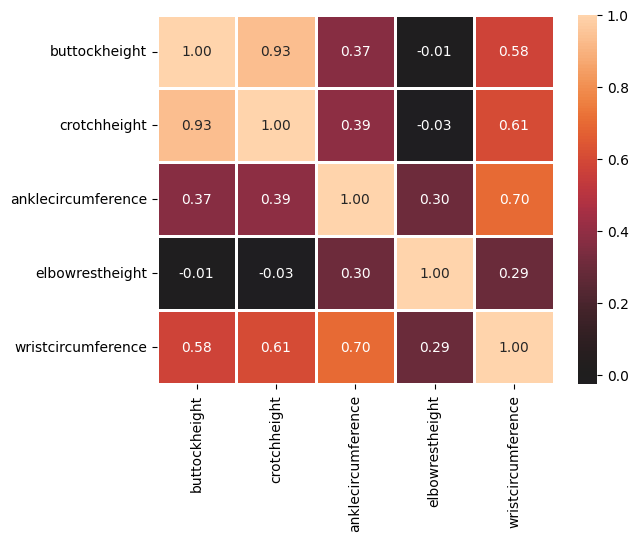

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Draw a heatmap of the correlation matrix
sns.heatmap(corr, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [17]:
import numpy as np

# Create the correlation matrix
corr = ansur_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

print(mask)

[[ True  True  True  True  True]
 [False  True  True  True  True]
 [False False  True  True  True]
 [False False False  True  True]
 [False False False False  True]]


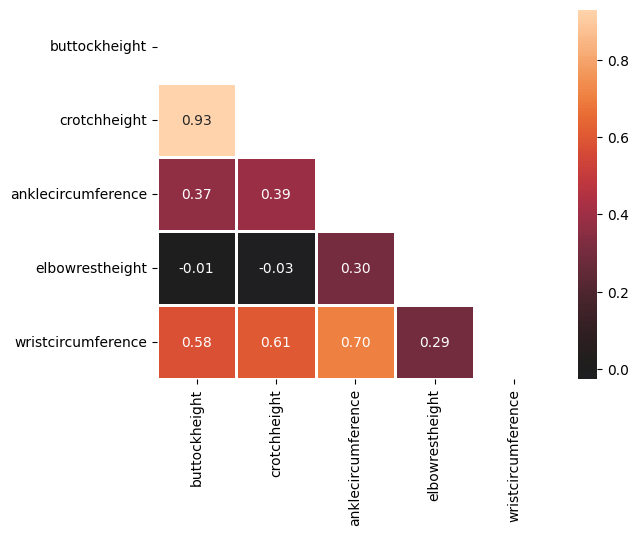

In [18]:
# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

## Removing highly correlated features
- Features that are perfectly correlated to each other, with a correlation coefficient of 1 or -1 brings no new information to a dataset but do add to the complexity.

In [19]:
ansur_male.shape

(4082, 99)

In [23]:
# Calculate the correlation matrix and take the absolute value
corr_df = ansur_male.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)

In [29]:
# Correlation matrix
corr_df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,...,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
abdominalextensiondepthsitting,1.000000,0.224434,0.170954,0.497515,0.134081,0.367195,0.170937,0.326776,0.636608,0.482609,0.727489,0.225024,0.483800,0.613691,0.437947,0.802912,0.849958,0.095820,0.386662,0.231905,0.654188,0.193446,0.574084,0.830781,0.805215,0.138787,0.017638,0.541228,0.168210,0.150115,0.330817,0.001316,0.268922,0.128394,0.332109,0.188144,0.198966,0.603365,0.721777,0.142067,...,0.489564,0.124679,0.218424,0.099927,0.244017,0.716392,0.142818,0.727170,0.669119,0.183646,0.191904,0.054251,0.093043,0.650803,0.122492,0.005069,0.116650,0.307436,0.098597,0.155850,0.218204,0.173109,0.761796,0.698421,0.261222,0.134372,0.072815,0.084673,0.723503,0.519272,0.854563,0.941819,0.963968,0.517934,0.037049,0.514556,0.305134,0.829285,0.144271,0.863621
acromialheight,0.224434,1.000000,0.814040,0.376775,0.982420,0.477271,0.661859,0.503104,0.239536,0.535632,0.362834,0.483380,0.333541,0.305272,0.186830,0.394114,0.280619,0.834523,0.826504,0.784143,0.297299,0.977008,0.385488,0.323950,0.295434,0.948300,0.857323,0.436465,0.372559,0.150556,0.205753,0.001088,0.222676,0.693954,0.459990,0.710515,0.763046,0.342187,0.279413,0.791265,...,0.294031,0.845447,0.902418,0.866359,0.477839,0.343784,0.293733,0.261493,0.320210,0.778270,0.594771,0.837359,0.722400,0.411373,0.824733,0.305885,0.702364,0.777404,0.813487,0.810731,0.975324,0.936778,0.310866,0.301478,0.704768,0.867264,0.143047,0.852785,0.624829,0.552619,0.319452,0.288020,0.239102,0.447929,0.896123,0.503722,0.897837,0.525455,0.966852,0.084408
acromionradialelength,0.170954,0.814040,1.000000,0.275878,0.802174,0.384789,0.586910,0.470837,0.173308,0.415150,0.301258,0.398774,0.287484,0.240866,0.156680,0.299036,0.193316,0.754137,0.747989,0.727919,0.220652,0.814490,0.299577,0.263999,0.254938,0.780120,0.789804,0.277912,0.244546,0.120221,0.140095,0.000258,0.133157,0.471135,0.373900,0.622679,0.739958,0.274755,0.214619,0.769440,...,0.271444,0.753342,0.801819,0.774890,0.345125,0.252321,0.257160,0.203929,0.249836,0.702093,0.546922,0.761525,0.719061,0.361779,0.963447,0.322167,0.473782,0.823638,0.914592,0.854838,0.803086,0.801845,0.228026,0.227681,0.724336,0.765524,0.118534,0.773931,0.425924,0.412314,0.234058,0.218640,0.185192,0.289370,0.784039,0.418066,0.564607,0.420425,0.795253,0.054892
anklecircumference,0.497515,0.376775,0.275878,1.000000,0.315911,0.682288,0.460670,0.440006,0.575656,0.527054,0.597690,0.638808,0.455484,0.462047,0.386506,0.677738,0.602463,0.218328,0.437985,0.264486,0.816255,0.375277,0.491056,0.585882,0.548488,0.334961,0.224330,0.536593,0.342453,0.088443,0.234889,0.066521,0.277525

In [30]:
# Shape of correlation matrix
corr_df.shape

(94, 94)

In [31]:
# Create a mask with upper triangular matrix
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

In [32]:
# Shape of mask == shape of correlation matrix
mask.shape

(94, 94)

In [33]:
# Applying mask to correlation matrix
tri_df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,...,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
abdominalextensiondepthsitting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acromialheight,0.224434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acromionradialelength,0.170954,0.814040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anklecircumference,0.497515,0.376775,0.275878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
axillaheight,0.134081,0.982420,0.802174,0.315911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wristcircumference,0.514556,0.503722,0.418066,0.680787,0.444168,0.662016,0.492718,0.536316,0.600749,0.503548,0.625713,0.594863,0.520254,0.513662,0.408440,0.618469,0.564629,0.367487,0.517754,0.352009,0.631857,0.502801,0.519656,0.605220,0.569337,0.445834,0.336188,0.525378,0.318464,0.141278,0.295084,0.053364,0.243000,0.453073,0.596661,0.554982,0.509440,0.723933,0.571024,0.502831,...,0.467611,0.388645,0.508877,0.390560,0.406225,0.653897,0.267914,0.598831,0.

In [35]:
# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

# Drop the features in the to_drop list
reduced_df = ansur_male.drop(to_drop, axis=1)

print(f"The reduced_df DataFrame has {reduced_df.shape[1]} columns.")

The reduced_df DataFrame has 88 columns.
